In [1]:
!unzip "/content/drive/MyDrive/catdog.zip"

Archive:  /content/drive/MyDrive/catdog.zip
replace catdog/test/cats/1500.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
# creating model
from keras import layers
from keras.models import Sequential

In [3]:
model = Sequential()

model.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)  ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation = "relu"  ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3), activation = "relu"   ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256,(3,3), activation = "relu"   ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))


model.add(layers.Dense(1,activation="sigmoid"))


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
# Compiling Model

from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 1e-4 ), 
              metrics = ["acc"])



In [6]:
# Data Generation - veri artırımı

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

 

In [7]:
train_dir = "/content/catdog/train"
validation_dir  =  "/content/catdog/validation"

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = "binary")
                                                                   

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = "binary")                                                                   

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
#training


history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator,

                    validation_steps  = 50)

Epoch 1/20
100/100 [==============================] - 13s 99ms/step - loss: 0.6878 - acc: 0.5423 - val_loss: 0.6710 - val_acc: 0.5990
Epoch 2/20
100/100 [==============================] - 9s 95ms/step - loss: 0.6365 - acc: 0.6373 - val_loss: 0.6255 - val_acc: 0.6350
Epoch 3/20
100/100 [==============================] - 9s 94ms/step - loss: 0.5927 - acc: 0.6888 - val_loss: 0.6059 - val_acc: 0.6730
Epoch 4/20
100/100 [==============================] - 9s 94ms/step - loss: 0.5440 - acc: 0.7189 - val_loss: 0.6062 - val_acc: 0.6530
Epoch 5/20
100/100 [==============================] - 9s 94ms/step - loss: 0.5086 - acc: 0.7429 - val_loss: 0.5785 - val_acc: 0.6920
Epoch 6/20
100/100 [==============================] - 9s 94ms/step - loss: 0.4749 - acc: 0.7739 - val_loss: 0.5617 - val_acc: 0.6880
Epoch 7/20
100/100 [==============================] - 10s 95ms/step - loss: 0.4383 - acc: 0.8014 - val_loss: 0.5565 - val_acc: 0.7180
Epoch 8/20
100/100 [==============================] - 10s 96ms/step

In [10]:
import matplotlib.pyplot as plt

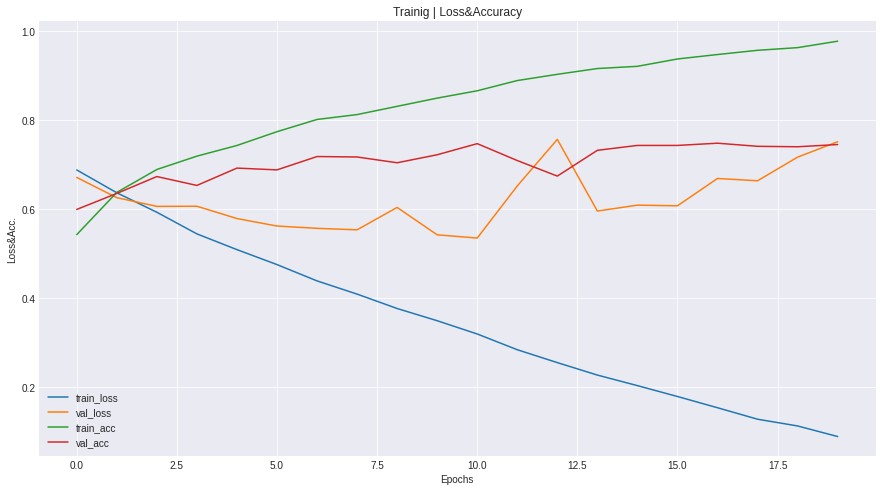

In [11]:
# visualization

"""import matplotlib as plt"""
import numpy as np 
 

plt.style.use("seaborn-darkgrid") 
plt.figure(figsize=(15,8))

epochs = 20
plt.plot(np.arange(0,epochs), history.history["loss"], label = "train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"], label = "val_loss")


plt.plot(np.arange(0,epochs), history.history["acc"], label = "train_acc")
plt.plot(np.arange(0,epochs), history.history["val_acc"], label = "val_acc")



plt.title("Trainig | Loss&Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss&Acc.")
plt.legend(loc = "lower left")
# overfitting söz konusu

In [12]:
###   Problem :  overfitting ile mücadele
# 1 new model   
# 2 data augmentation

In [13]:
# Creating New Model
model_x = Sequential()

model_x.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)  ))
model_x.add(layers.MaxPooling2D(2,2))

model_x.add(layers.Conv2D(64,(3,3), activation = "relu"  ))
model_x.add(layers.MaxPooling2D(2,2))

model_x.add(layers.Conv2D(128,(3,3), activation = "relu"   ))
model_x.add(layers.MaxPooling2D(2,2))

model_x.add(layers.Conv2D(256,(3,3), activation = "relu"   ))
model_x.add(layers.MaxPooling2D(2,2))

model_x.add(layers.Flatten())
model_x.add(layers.Dropout(0.4))  # ek olarak yaptıgım burası


model_x.add(layers.Dense(512,activation="relu"))


model_x.add(layers.Dense(1,activation="sigmoid"))


model_x.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [14]:
model_x.compile(loss="binary_crossentropy",
                optimizer = optimizers.RMSprop(learning_rate = 1e-4 ), 
                metrics = ["acc"])

In [15]:
# veri artırımı 
train_datagen_x = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 45,
                                       width_shift_range = 0.3,
                                       height_shift_range = 0.3,
                                       shear_range = 0.3,
                                       zoom_range = 0.35,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       fill_mode = "nearest"
                                       )

validation_datagen_x = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 45,
                                       width_shift_range = 0.3,
                                       height_shift_range = 0.3,
                                       shear_range = 0.3,
                                       zoom_range = 0.35,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       fill_mode = "nearest"
                                       )



In [16]:
train_generator_x = train_datagen_x.flow_from_directory(train_dir,
                                                        target_size = (150,150),
                                                        batch_size = 30,
                                                        class_mode = "binary")


validation_generator_x = validation_datagen_x.flow_from_directory(validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 30,
                                                        class_mode = "binary")

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
"""from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)"""

"from tensorflow.keras.callbacks import EarlyStopping\nearly_stop = EarlyStopping(monitor='val_loss',patience=2)"

In [18]:
history_x = model_x.fit(          train_generator_x,
                                  batch_size=48, epochs=100,
                                  validation_data =  validation_generator_x)

Epoch 1/100
67/67 [==============================] - 23s 326ms/step - loss: 0.6948 - acc: 0.5253 - val_loss: 0.6873 - val_acc: 0.4990
Epoch 2/100
67/67 [==============================] - 21s 318ms/step - loss: 0.6844 - acc: 0.5563 - val_loss: 0.6741 - val_acc: 0.5730
Epoch 3/100
67/67 [==============================] - 21s 322ms/step - loss: 0.6773 - acc: 0.5658 - val_loss: 0.6644 - val_acc: 0.5880
Epoch 4/100
67/67 [==============================] - 21s 319ms/step - loss: 0.6685 - acc: 0.5738 - val_loss: 0.6569 - val_acc: 0.6040
Epoch 5/100
67/67 [==============================] - 21s 319ms/step - loss: 0.6557 - acc: 0.6123 - val_loss: 0.6516 - val_acc: 0.6050
Epoch 6/100
67/67 [==============================] - 21s 320ms/step - loss: 0.6583 - acc: 0.5948 - val_loss: 0.6444 - val_acc: 0.6080
Epoch 7/100
67/67 [==============================] - 21s 320ms/step - loss: 0.6498 - acc: 0.6038 - val_loss: 0.6375 - val_acc: 0.6060
Epoch 8/100
67/67 [==============================] - 21s 319ms

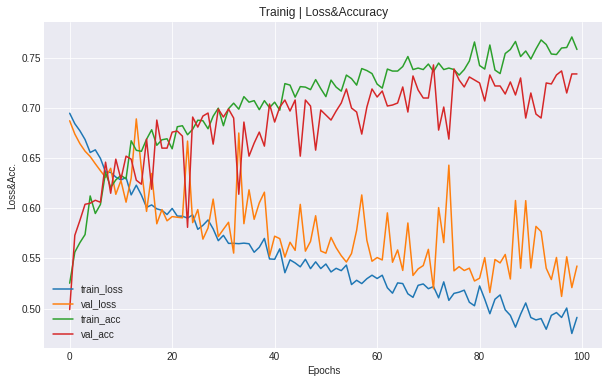

In [19]:
# visualization

 

plt.style.use("seaborn-darkgrid") 
plt.figure(figsize=(10,6))

epochs = 100
plt.plot(np.arange(0,epochs), history_x.history["loss"], label = "train_loss")
plt.plot(np.arange(0,epochs), history_x.history["val_loss"], label = "val_loss")


plt.plot(np.arange(0,epochs), history_x.history["acc"], label = "train_acc")
plt.plot(np.arange(0,epochs), history_x.history["val_acc"], label = "val_acc")



plt.title("Trainig | Loss&Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss&Acc.")
plt.legend(loc = "lower left")

In [20]:
model_x.save("/content/catdog/models/cat_dog.h5")

In [21]:
from keras.preprocessing.image import load_img , img_to_array
from keras.models import load_model


In [22]:
# prediction
model_path = "/content/catdog/models/cat_dog.h5"
image_path = "/content/catdog/test/dogs/1511.jpg"

In [23]:
prediction_model = load_model(model_path)
test_img = load_img(image_path)

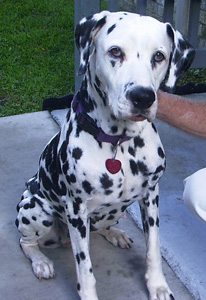

In [24]:
test_img

In [25]:
test_img = img_to_array(test_img)
test_img.shape # modelimi eğitirken 150*150 olacağını söylemiştik bunu reshape yapmamız gerekiyor

(300, 206, 3)

In [26]:
test_img = load_img(image_path, target_size=(150,150))
print(test_img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x7FB26BDDEC90>


In [27]:
# 4 boyutlu bir numppy array olması gerekiyor 

test_img = np.expand_dims(test_img, axis = 0 )

In [28]:
test_img 

array([[[[ 44,  80,  32],
         [ 42,  70,  29],
         [ 30,  56,  19],
         ...,
         [ 71,  85,  94],
         [ 67,  85,  99],
         [ 60,  73,  90]],

        [[ 35,  59,  33],
         [ 46,  67,  48],
         [ 53,  72,  50],
         ...,
         [ 79,  96, 106],
         [ 93, 111, 125],
         [ 63,  79,  95]],

        [[ 41,  74,  31],
         [ 29,  63,  30],
         [ 28,  62,  25],
         ...,
         [ 89,  92, 107],
         [ 84,  87, 106],
         [ 76,  78, 101]],

        ...,

        [[133, 138, 168],
         [124, 131, 160],
         [124, 131, 160],
         ...,
         [140, 159, 201],
         [138, 157, 200],
         [151, 170, 213]],

        [[126, 135, 166],
         [122, 129, 158],
         [126, 133, 161],
         ...,
         [150, 169, 211],
         [144, 166, 207],
         [145, 164, 206]],

        [[131, 134, 165],
         [121, 131, 158],
         [125, 137, 161],
         ...,
         [147, 164, 210],
        

In [29]:
train_generator_x.class_indices

{'cats': 0, 'dogs': 1}

In [30]:
result = prediction_model.predict(test_img)

In [31]:
model_x.predict(test_img)

array([[1.]], dtype=float32)